In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Đọc Data Test và Data Train**

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/DS102/kdd_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/DS102/kdd_test.csv')

**Đọc tổng quát Data Train**

In [5]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


**Chiều của Data Train**

In [6]:
df_train.shape

(125973, 42)

**Kiểu dữ liệu của từng thuộc tính**

In [7]:
df_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

**Đếm các giá trị Null của từng Feartures**

In [8]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

**Trực quan hóa Data**

In [9]:
column = df_train.columns

In [10]:
column

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

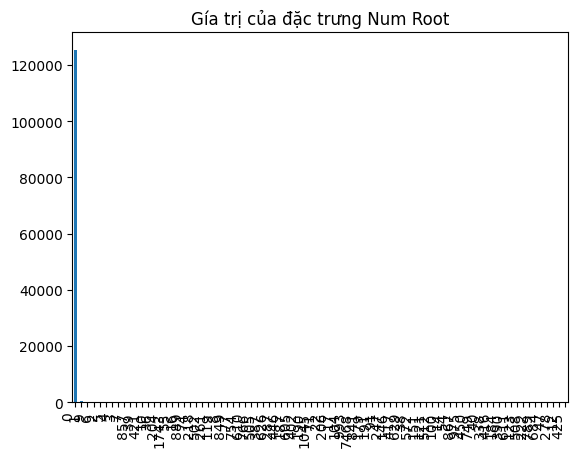

In [11]:
df_train['num_root'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Num Root')
plt.xticks(rotation=90, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

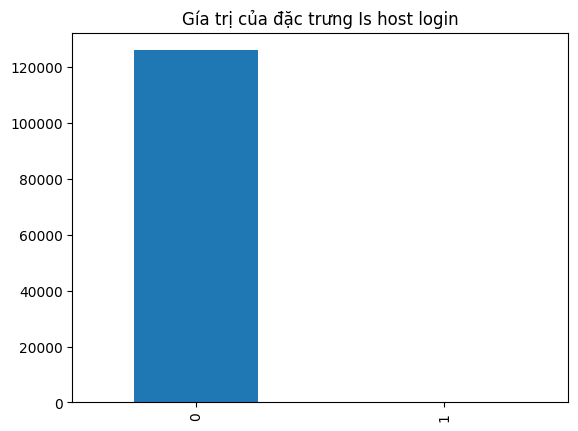

In [12]:
df_train['is_host_login'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Is host login')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

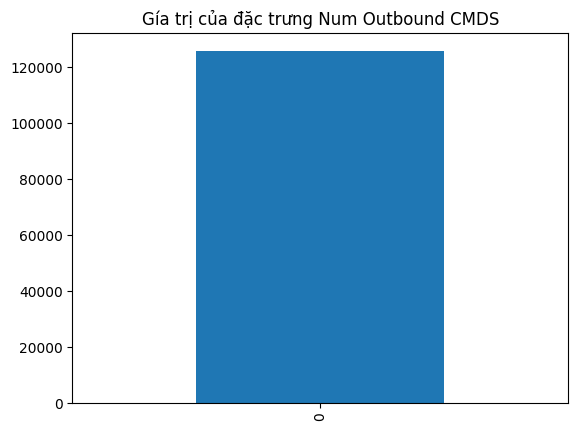

In [13]:
df_train['num_outbound_cmds'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Num Outbound CMDS')
plt.show

In [14]:
del df_train['num_outbound_cmds']
del df_train['is_host_login']
del df_train['num_root']

In [15]:
del df_test['num_outbound_cmds']
del df_test['is_host_login']
del df_test['num_root']

In [16]:
df_train.shape

(125973, 39)

**Nhận xét: Có thể loại bỏ Feature Num_outbound_cmds**

<Axes: >

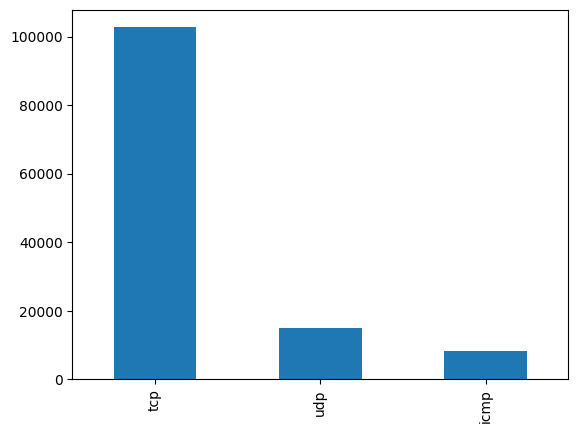

In [17]:
df_train['protocol_type'].value_counts().plot(kind="bar")

<Axes: >

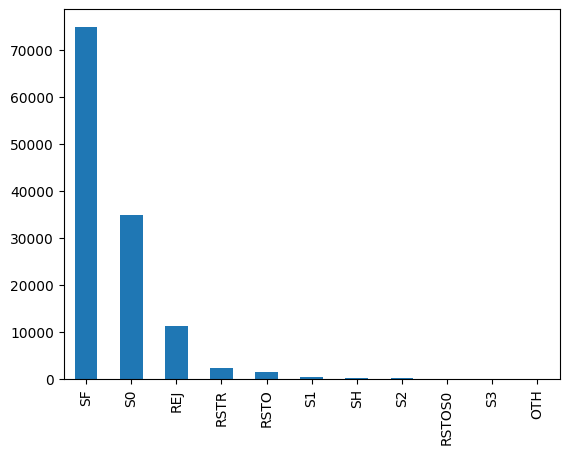

In [18]:
df_train['flag'].value_counts().plot(kind="bar")

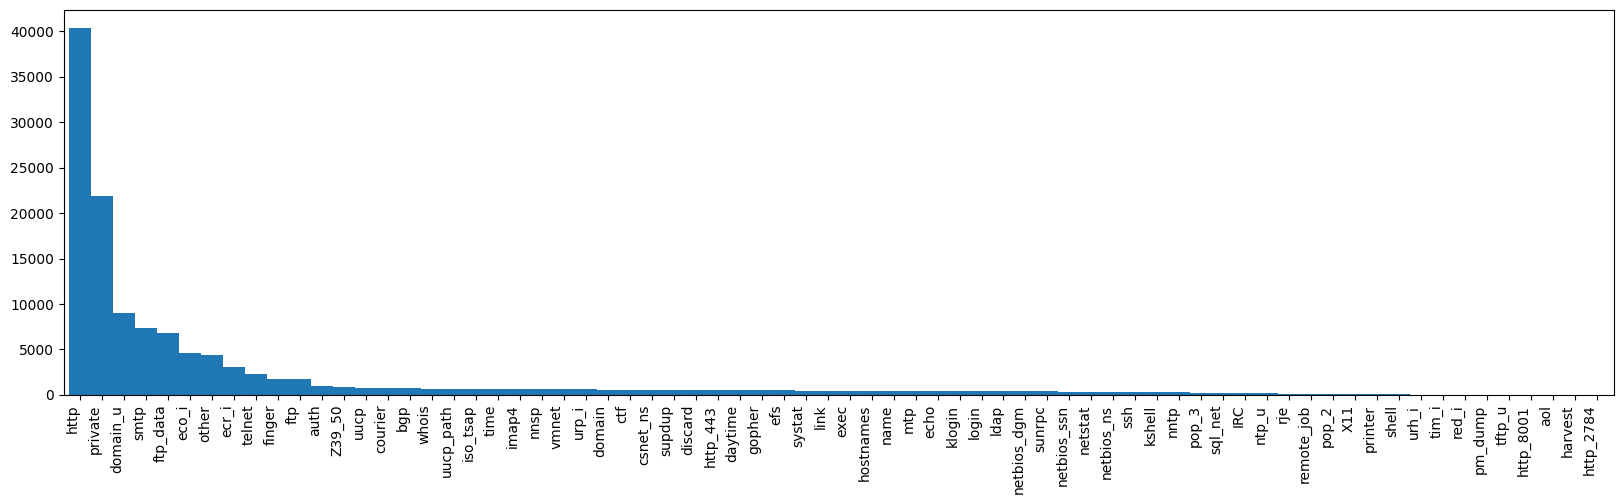

In [19]:
plt.figure(figsize=(20, 5))
df_train['service'].value_counts().plot(kind="bar", width=1)
plt.xticks(rotation=90, ha='right')
plt.show()

**Correlation giữa các Feartures**

<ipython-input-20-9534cb99d480>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


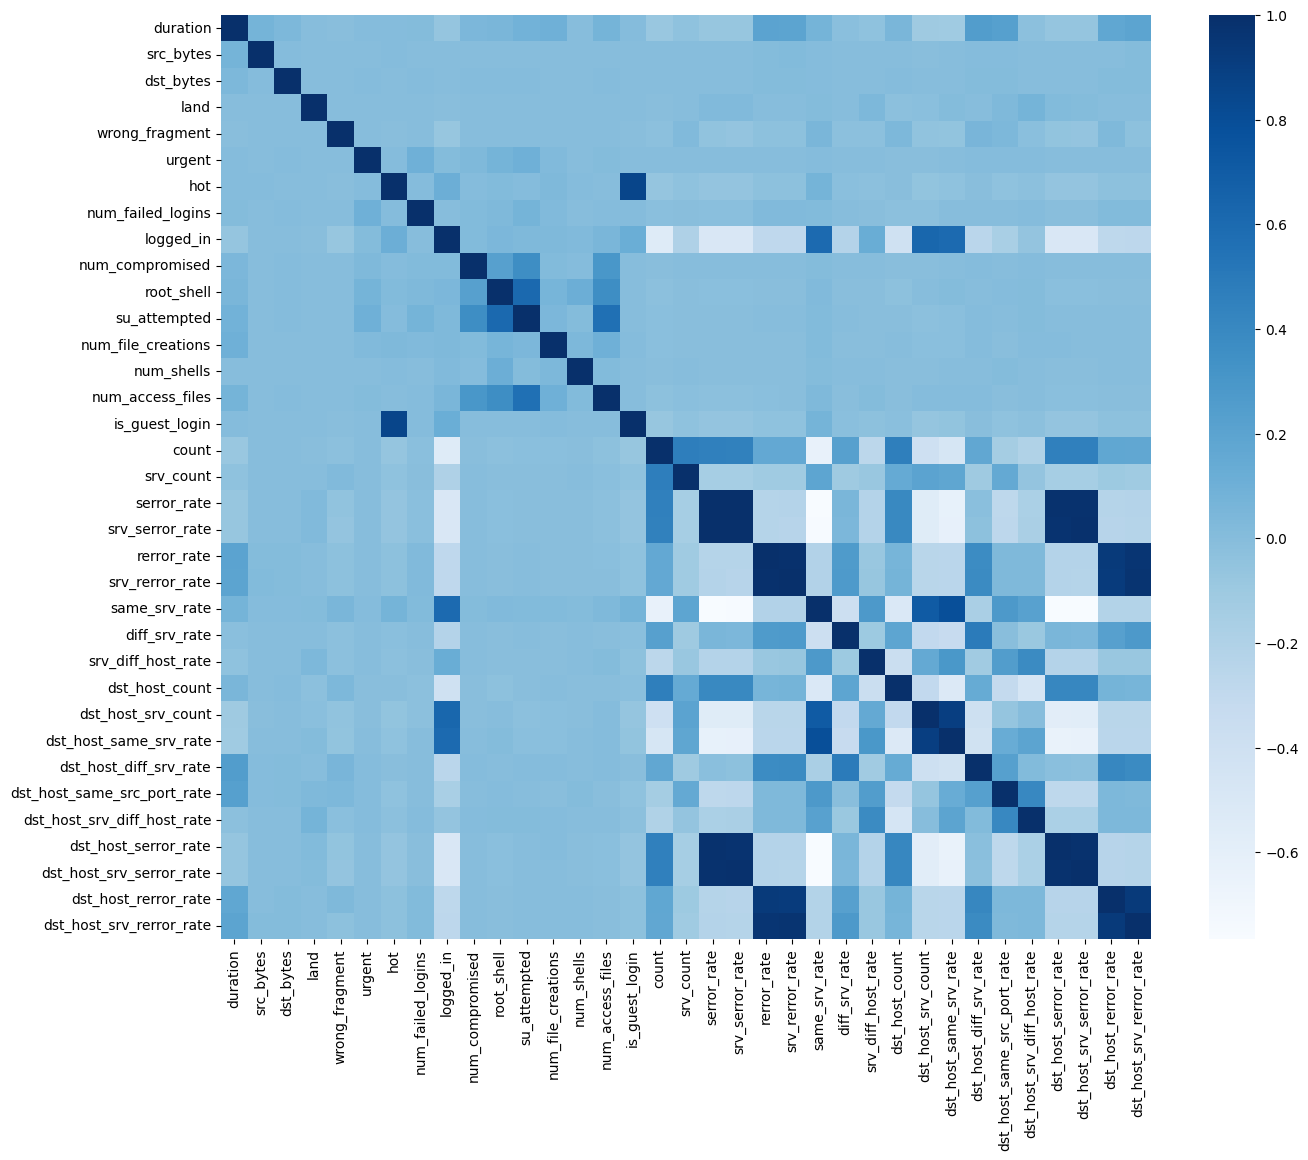

In [20]:
corr = df_train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap="Blues")
plt.show()

**Features Choosing**

In [27]:
df_train.drop('src_bytes',axis = 1, inplace=True)
df_train.drop('dst_bytes',axis = 1, inplace=True)
df_train.drop('land',axis = 1, inplace=True)
df_train.drop('wrong_fragment',axis = 1, inplace=True)
df_train.drop('hot',axis = 1, inplace=True)
df_train.drop('num_failed_logins',axis = 1, inplace=True)
df_train.drop('su_attempted',axis = 1, inplace=True)
df_train.drop('num_file_creations',axis = 1, inplace=True)
df_train.drop('num_access_files',axis = 1, inplace=True)
df_train.drop('is_guest_login',axis = 1, inplace=True)
df_train.drop('srv_count',axis = 1, inplace=True)
df_train.drop('srv_diff_host_rate',axis = 1, inplace=True)

In [34]:
df_test.drop('src_bytes',axis = 1, inplace=True)
df_test.drop('dst_bytes',axis = 1, inplace=True)
df_test.drop('land',axis = 1, inplace=True)
df_test.drop('wrong_fragment',axis = 1, inplace=True)
df_test.drop('hot',axis = 1, inplace=True)
df_test.drop('num_failed_logins',axis = 1, inplace=True)
df_test.drop('su_attempted',axis = 1, inplace=True)
df_test.drop('num_file_creations',axis = 1, inplace=True)
df_test.drop('num_access_files',axis = 1, inplace=True)
df_test.drop('is_guest_login',axis = 1, inplace=True)
df_test.drop('srv_count',axis = 1, inplace=True)
df_test.drop('srv_diff_host_rate',axis = 1, inplace=True)

In [35]:
df_train.shape

(125973, 23)

In [36]:
df_test.shape

(22544, 23)

**FEATURES MAPPING**

In [37]:
df_train.head()

,duration,protocol_type,service,flag,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,0,2,0.0,0.0,0.0,0.0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,0,13,0.0,0.0,0.0,0.0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,123,1.0,1.0,0.0,0.0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,1,5,0.2,0.2,0.0,0.0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,1,30,0.0,0.0,0.0,0.0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


Protocol Type

In [38]:
df_train['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [39]:
pmap = {'icmp' : 0, 'tcp' : 1, 'udp' : 2}
df_train['protocol_type'] = df_train['protocol_type'].map(pmap)

In [40]:
df_test['protocol_type'] = df_test['protocol_type'].map(pmap)

Flag

In [41]:
df_train['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [42]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df_train['flag'] = df_train['flag'].map(fmap)

In [43]:
df_test['flag'] = df_test['flag'].map(fmap)

Service

In [44]:
service = df_train['service'].unique()

In [45]:
service

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [46]:
service_dict = {feature: index for index, feature in enumerate(service)}
service_dict

{'ftp_data': 0,
 'other': 1,
 'private': 2,
 'http': 3,
 'remote_job': 4,
 'name': 5,
 'netbios_ns': 6,
 'eco_i': 7,
 'mtp': 8,
 'telnet': 9,
 'finger': 10,
 'domain_u': 11,
 'supdup': 12,
 'uucp_path': 13,
 'Z39_50': 14,
 'smtp': 15,
 'csnet_ns': 16,
 'uucp': 17,
 'netbios_dgm': 18,
 'urp_i': 19,
 'auth': 20,
 'domain': 21,
 'ftp': 22,
 'bgp': 23,
 'ldap': 24,
 'ecr_i': 25,
 'gopher': 26,
 'vmnet': 27,
 'systat': 28,
 'http_443': 29,
 'efs': 30,
 'whois': 31,
 'imap4': 32,
 'iso_tsap': 33,
 'echo': 34,
 'klogin': 35,
 'link': 36,
 'sunrpc': 37,
 'login': 38,
 'kshell': 39,
 'sql_net': 40,
 'time': 41,
 'hostnames': 42,
 'exec': 43,
 'ntp_u': 44,
 'discard': 45,
 'nntp': 46,
 'courier': 47,
 'ctf': 48,
 'ssh': 49,
 'daytime': 50,
 'shell': 51,
 'netstat': 52,
 'pop_3': 53,
 'nnsp': 54,
 'IRC': 55,
 'pop_2': 56,
 'printer': 57,
 'tim_i': 58,
 'pm_dump': 59,
 'red_i': 60,
 'netbios_ssn': 61,
 'rje': 62,
 'X11': 63,
 'urh_i': 64,
 'http_8001': 65,
 'aol': 66,
 'http_2784': 67,
 'tftp_u': 

In [47]:
df_train['service'] = df_train['service'].map(service_dict)

In [48]:
df_test['service'] = df_test['service'].map(service_dict)

In [49]:
df_train.head()

,duration,protocol_type,service,flag,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,0,0,0,2,0.0,0.0,0.0,0.0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,1,0,0,13,0.0,0.0,0.0,0.0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,2,1,0,123,1.0,1.0,0.0,0.0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,1,3,0,1,5,0.2,0.2,0.0,0.0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,3,0,1,30,0.0,0.0,0.0,0.0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [50]:
df_train.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
logged_in                        int64
count                            int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
dst_host_count                   int64
dst_host_srv_count               int64
dst_host_same_srv_rate         float64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dst_host_serror_rate           float64
dst_host_srv_serror_rate       float64
dst_host_rerror_rate           float64
dst_host_srv_rerror_rate       float64
labels                          object
dtype: object

**LABEL MAPPING**

In [51]:
df_train['labels'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64

In [52]:
df_test['labels'].value_counts()

normal             11245
neptune             6654
satan                698
smurf                540
ipsweep              479
guess_passwd         411
portsweep            371
mscan                310
warezmaster          279
apache2              228
back                 227
processtable         211
nmap                 206
warezclient          107
teardrop             104
snmpguess             99
mailbomb              94
saint                 93
snmpgetattack         43
httptunnel            41
pod                   35
buffer_overflow       17
multihop               9
ps                     9
sendmail               8
xlock                  4
loadmodule             4
rootkit                4
xterm                  3
land                   2
imap                   2
ftp_write              2
named                  2
phf                    1
perl                   1
xsnoop                 1
Name: labels, dtype: int64

In [53]:
df_train.replace(['neptune', 'smurf', 'pod', 'teardrop', 'back', 'land', 'apache2', 'processtable', 'mailbomb', 'httptunnel'] , 'Dos', inplace=True)
df_train.replace(['satan', 'ipsweep', 'portsweep', 'nmap', 'mscan', 'snmpguess', 'saint', 'snmpgetattack'] , 'Probe', inplace=True)
df_train.replace(['guess_passwd', 'buffer_overflow', 'loadmodule', 'rootkit', 'ps', 'xterm'] , 'U2R', inplace=True)
df_train.replace(['warezmaster', 'warezclient', 'sendmail', 'xlock', 'imap', 'ftp_write', 'named', 'phf', 'perl', 'xsnoop', 'multihop', 'spy'] , 'R2L', inplace=True)

df_test.replace(['neptune', 'smurf', 'pod', 'teardrop', 'back', 'land', 'apache2', 'processtable', 'mailbomb', 'httptunnel'] , 'Dos', inplace=True)
df_test.replace(['satan', 'ipsweep', 'portsweep', 'nmap', 'mscan', 'snmpguess', 'saint', 'snmpgetattack'] , 'Probe', inplace=True)
df_test.replace(['guess_passwd', 'buffer_overflow', 'loadmodule', 'rootkit', 'ps', 'xterm'] , 'U2R', inplace=True)
df_test.replace(['warezmaster', 'warezclient', 'sendmail', 'xlock', 'imap', 'ftp_write', 'named', 'phf', 'perl', 'xsnoop', 'multihop', 'spy'] , 'R2L', inplace=True)

In [54]:
values_train = df_train['labels'].value_counts()

In [55]:
values_test = df_test['labels'].value_counts()

In [56]:
keys_train = ['Normal', 'Dos', 'Probe', 'R2L', 'U2R']
keys_test = ['Normal', 'Dos', 'Probe', 'U2R', 'R2L']

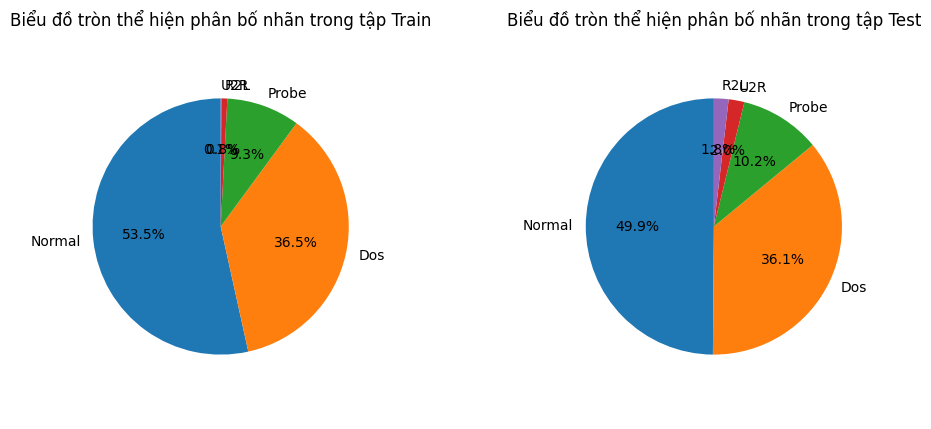

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ pie thứ nhất
axs[0].pie(values_train, labels=keys_train, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Biểu đồ tròn thể hiện phân bố nhãn trong tập Train')

# Biểu đồ pie thứ hai
axs[1].pie(values_test, labels=keys_test, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Biểu đồ tròn thể hiện phân bố nhãn trong tập Test')

# Đảm bảo đồ thị là hình tròn
axs[0].axis('equal')
axs[1].axis('equal')
plt.subplots_adjust(wspace=0.75)
# Hiển thị đồ thị
plt.show()

**Split data**

**Create Data Train and Data Val**

In [58]:
df_train.shape

(125973, 23)

In [59]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

In [60]:
X

,duration,protocol_type,service,flag,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,0,0,0,2,0.0,0.0,0.0,0.0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,1,0,0,13,0.0,0.0,0.0,0.0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,2,1,0,123,1.0,1.0,0.0,0.0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,3,0,1,5,0.2,0.2,0.0,0.0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,3,0,1,30,0.0,0.0,0.0,0.0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,2,1,0,184,1.0,1.0,0.0,0.0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,2,2,0,0,2,0.0,0.0,0.0,0.0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,1,15,0,1,1,0.0,0.0,0.0,0.0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,1,35,1,0,144,1.0,1.0,0.0,0.0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [61]:
y

0         normal
1         normal
2            Dos
3         normal
4         normal
           ...  
125968       Dos
125969    normal
125970    normal
125971       Dos
125972    normal
Name: labels, Length: 125973, dtype: object

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [64]:
X_test

,duration,protocol_type,service,flag,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,5,1,15,0,1,1,0.00,0.0,0.00,0.0,...,180,57,0.11,0.02,0.01,0.04,0.00,0.0,0.87,0.0
1,0,2,11,0,0,192,0.00,0.0,0.00,0.0,...,194,155,0.80,0.02,0.01,0.00,0.00,0.0,0.00,0.0
2,0,2,11,0,0,121,0.00,0.0,0.00,0.0,...,255,255,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.0
3,1979,2,1,0,0,2,0.00,0.0,0.00,0.0,...,255,2,0.01,0.84,1.00,0.00,0.00,0.0,0.00,0.0
4,14462,1,1,3,0,2,0.00,0.0,1.00,1.0,...,255,2,0.01,0.68,1.00,0.00,0.00,0.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,2,2,0,395,0.06,0.0,0.93,1.0,...,255,1,0.00,1.00,0.00,0.00,0.09,0.0,0.91,1.0
22540,0,1,3,0,1,2,0.00,0.0,0.00,0.0,...,27,255,1.00,0.00,0.04,0.04,0.00,0.0,0.00,0.0
22541,0,1,2,1,0,202,1.00,1.0,0.00,0.0,...,255,25,0.10,0.07,0.00,0.00,1.00,1.0,0.00,0.0
22542,0,1,2,3,0,2,0.00,0.0,0.50,1.0,...,255,1,0.00,0.58,0.57,0.00,0.00,0.0,0.58,1.0


**LABEL ENCODER**

In [66]:
lable_map = {'normal': 0, 'Dos': 1, 'Probe': 2, 'R2L': 3, 'U2R': 4}

In [67]:
y_train = y_train.map(lable_map)
y_val = y_val.map(lable_map)
y_test = y_test.map(lable_map)

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
y_train_encoder = to_categorical(y_train, num_classes=5)
y_train_encoder

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_val_encoder = to_categorical(y_val, num_classes=5)

In [68]:
correlations = X_train.corrwith(y_train)
print(correlations)

duration                       0.129966
protocol_type                 -0.286205
service                        0.184825
flag                           0.446130
logged_in                     -0.576705
count                          0.388093
serror_rate                    0.381997
srv_serror_rate                0.378597
rerror_rate                    0.309971
srv_rerror_rate                0.311767
same_srv_rate                 -0.511534
diff_srv_rate                  0.282829
dst_host_count                 0.198116
dst_host_srv_count            -0.623825
dst_host_same_srv_rate        -0.526631
dst_host_diff_srv_rate         0.392280
dst_host_same_src_port_rate    0.317297
dst_host_srv_diff_host_rate    0.239353
dst_host_serror_rate           0.382742
dst_host_srv_serror_rate       0.384680
dst_host_rerror_rate           0.295306
dst_host_srv_rerror_rate       0.312077
dtype: float64


**Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Concatenate, Add, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
focal_loss = tf.keras.losses.CategoricalFocalCrossentropy(alpha=0.75, gamma=2.0)

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
input_layer = Input(shape=(22, 1))

# Convolutional Neural Network (CNN) branch
cnn_branch = Conv1D(32, kernel_size=3, activation='relu')(input_layer)
cnn_branch = MaxPooling1D(pool_size=2)(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

# Recurrent Neural Network (RNN) branch
rnn_branch = LSTM(50, return_sequences=True)(input_layer)
rnn_branch = LSTM(50)(rnn_branch)

# Concatenate the outputs from both branches
merged = Concatenate()([cnn_branch, rnn_branch])

# Fully connected layers
dense_layer = Dense(256, activation='relu')(merged)
dense_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(5, activation='softmax')(dense_layer)
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.compile(loss=focal_loss,
                   optimizer=Adam(learning_rate=0.0001),
                   metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 38, 1)]              0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 36, 32)               128       ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 18, 32)               0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 lstm (LSTM)                 (None, 38, 50)               10400     ['input_1[0][0]']         

In [ ]:
# Huấn luyện mô hình
a = model.fit(X_train, y_train_encoder, epochs = 2000, batch_size = 10000, validation_data = (X_val, y_val_encoder), callbacks=[checkpoint])

Epoch 1/200
10/11 [==========================>...] - ETA: 0s - loss: 0.0080 - accuracy: 0.9945
Epoch 1: val_accuracy did not improve from 0.99571
11/11 [==============================] - 4s 165ms/step - loss: 0.0080 - accuracy: 0.9945 - val_loss: 0.0134 - val_accuracy: 0.9945
Epoch 2/200
10/11 [==========================>...] - ETA: 0s - loss: 0.0081 - accuracy: 0.9947
Epoch 2: val_accuracy did not improve from 0.99571
11/11 [==============================] - 1s 89ms/step - loss: 0.0082 - accuracy: 0.9946 - val_loss: 0.0121 - val_accuracy: 0.9945
Epoch 3/200
10/11 [==========================>...] - ETA: 0s - loss: 0.0081 - accuracy: 0.9945
Epoch 3: val_accuracy did not improve from 0.99571
11/11 [==============================] - 1s 89ms/step - loss: 0.0081 - accuracy: 0.9945 - val_loss: 0.0114 - val_accuracy: 0.9948
Epoch 4/200
10/11 [==========================>...] - ETA: 0s - loss: 0.0080 - accuracy: 0.9944
Epoch 4: val_accuracy did not improve from 0.99571
11/11 [==================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/11 [==========================>...] - ETA: 0s - loss: 0.0072 - accuracy: 0.9961
Epoch 27: val_accuracy improved from 0.99587 to 0.99603, saving model to best_model.h5
11/11 [==============================] - 1s 96ms/step - loss: 0.0071 - accuracy: 0.9961 - val_loss: 0.0127 - val_accuracy: 0.9960
Epoch 28/200
10/11 [==========================>...] - ETA: 0s - loss: 0.0069 - accuracy: 0.9963
Epoch 28: val_accuracy did not improve from 0.99603
11/11 [==============================] - 1s 97ms/step - loss: 0.0071 - accuracy: 0.9963 - val_loss: 0.0126 - val_accuracy: 0.9957
Epoch 29/200
10/11 [==========================>...] - ETA: 0s - loss: 0.0070 - accuracy: 0.9962
Epoch 29: val_accuracy did not improve from 0.99603
11/11 [==============================] - 1s 97ms/step - loss: 0.0069 - accuracy: 0.9963 - val_loss: 0.0137 - val_accuracy: 0.9948
Epoch 30/200
10/11 [==========================>...] - ETA: 0s - loss: 0.0070 - accuracy: 0.9965
Epoch 30: val_accuracy did not improve from 0.99

**MODEL EVALUATE**

In [ ]:
from tensorflow.keras.models import load_model
# Tải model từ file
model = load_model('/content/best_model.h5')

In [ ]:
Test_array = model.predict(X_test)

705/705 [==============================] - 3s 3ms/step


In [ ]:
import numpy as np
y_predict = np.argmax(Test_array, axis=-1)

In [ ]:
y_predict

array([0, 0, 0, ..., 1, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy =  accuracy_score(y_test, y_predict)
accuracy * 100

92.68541518807665

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

# Tính F1 Macro
f1_macro = f1_score(y_test, y_predict, average='macro')

print("F1 Macro:", f1_macro)

F1 Macro: 0.6601795640933502


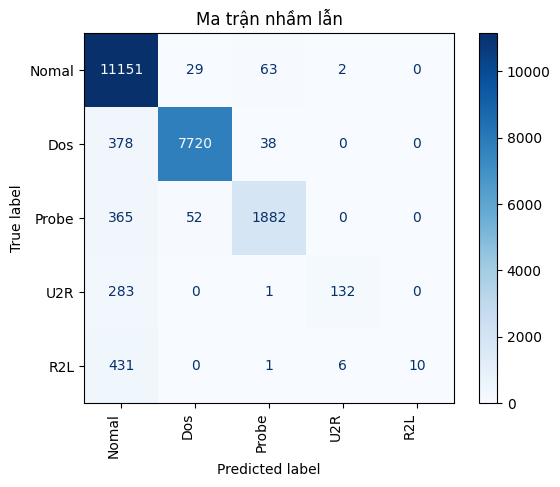

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_predict)

# Vẽ biểu đồ ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Nomal', 'Dos', 'Probe', 'U2R', 'R2L'])
disp.plot(cmap='Blues')
plt.xticks(rotation=90, ha='right')
plt.title('Ma trận nhầm lẫn')
plt.show()


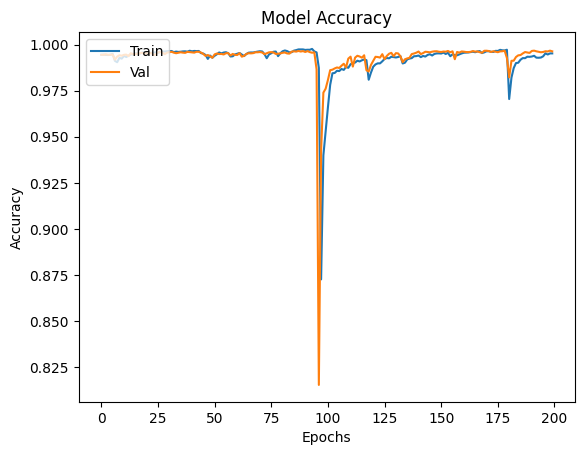

In [ ]:
import matplotlib.pyplot as plt

plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

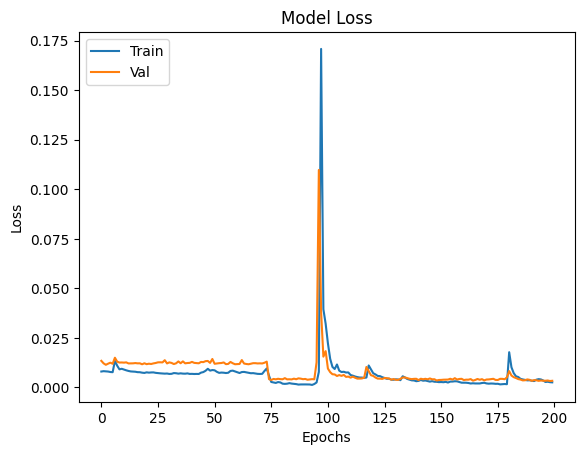

In [ ]:
import matplotlib.pyplot as plt

plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()